In [1]:
import pandas as pd
import numpy as np

In [2]:
import os
current_directory = os.getcwd()
parent_directory = os.path.dirname(current_directory)

In [3]:
training_data = pd.read_csv(parent_directory + '/Data/fashion-mnist_train.csv')
testing_data = pd.read_csv(parent_directory+ '/Data/fashion-mnist_test.csv')

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
train_data, val_data = train_test_split(training_data, test_size=0.25)

In [6]:
train_data.shape

(45000, 785)

In [7]:
val_data.shape

(15000, 785)

In [8]:
testing_data.shape

(10000, 785)

In [9]:
# DO NOT RUN THIS CODE SINCE WE ONLY DID THE TRAIN TEST SPLIT ONCE AND IF WE DO IT AGAIN
# THE RESULTS MIGHT CHANGE USE THE ALREADY SPLITTED DATA

# train_data.to_csv(parent_directory + '/Data/training_data.csv',index=False)
# val_data.to_csv(parent_directory + '/Data/validation_data.csv',index=False)
# testing_data.to_csv(parent_directory + '/Data/testing_data.csv',index=False)

## EDA

In [10]:
#loading the saved data

train_data = pd.read_csv(parent_directory + '/Data/training_data.csv')
val_data = pd.read_csv(parent_directory + '/Data/validation_data.csv')
test_data = pd.read_csv(parent_directory + '/Data/testing_data.csv')

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# Checking label distribution in the training data
train_label_counts = train_data['label'].value_counts().sort_index()
print("Training Data Label Distribution:")
print(train_label_counts)

# Checking label distribution in the validation data
val_label_counts = val_data['label'].value_counts().sort_index()
print("\nValidation Data Label Distribution:")
print(val_label_counts)

# Checking label distribution in the testing data
test_label_counts = test_data['label'].value_counts().sort_index()
print("\nTesting Data Label Distribution:")
print(test_label_counts)


Training Data Label Distribution:
label
0    4525
1    4548
2    4470
3    4483
4    4477
5    4577
6    4491
7    4496
8    4473
9    4460
Name: count, dtype: int64

Validation Data Label Distribution:
label
0    1475
1    1452
2    1530
3    1517
4    1523
5    1423
6    1509
7    1504
8    1527
9    1540
Name: count, dtype: int64

Testing Data Label Distribution:
label
0    1000
1    1000
2    1000
3    1000
4    1000
5    1000
6    1000
7    1000
8    1000
9    1000
Name: count, dtype: int64


Class Distribution:
label
5    4577
1    4548
0    4525
7    4496
6    4491
3    4483
4    4477
8    4473
2    4470
9    4460
Name: count, dtype: int64


/var/folders/15/cby73gvd7s981xvv1q5thfdh0000gn/T/ipykernel_49438/3434837713.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=train_data, palette='viridis')


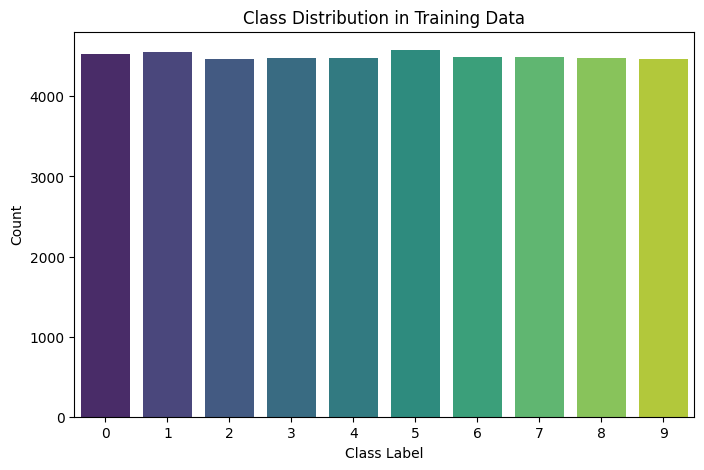

In [13]:
# Class distribution
class_distribution = train_data['label'].value_counts()
print("Class Distribution:")
print(class_distribution)

# Ploting class distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='label', data=train_data, palette='viridis')
plt.title('Class Distribution in Training Data')
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.show()

In [14]:
# Data statistics
data_statistics = train_data.describe()
print("\nData Statistics:")
print(data_statistics)


Data Statistics:
              label        pixel1        pixel2        pixel3        pixel4  \
count  45000.000000  45000.000000  45000.000000  45000.000000  45000.000000   
mean       4.490489      0.000911      0.006222      0.033867      0.104467   
std        2.871121      0.102953      0.252908      1.257882      2.546703   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        2.000000      0.000000      0.000000      0.000000      0.000000   
50%        4.000000      0.000000      0.000000      0.000000      0.000000   
75%        7.000000      0.000000      0.000000      0.000000      0.000000   
max        9.000000     16.000000     34.000000    226.000000    164.000000   

             pixel5        pixel6        pixel7        pixel8        pixel9  \
count  45000.000000  45000.000000  45000.000000  45000.000000  45000.000000   
mean       0.245733      0.411067      0.812622      2.218200      5.747444   
std        4.385628      5.950256

/var/folders/15/cby73gvd7s981xvv1q5thfdh0000gn/T/ipykernel_49438/3932995603.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=train_data, palette='viridis')


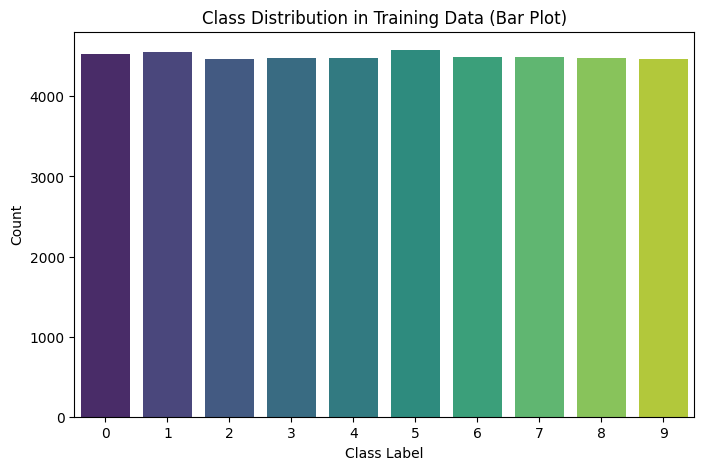

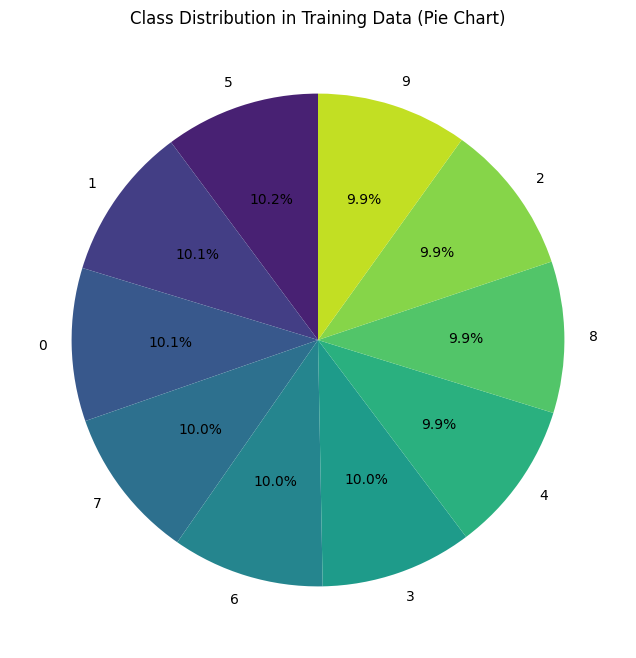

In [15]:
# Visualizing Class Distribution using a Bar Plot
plt.figure(figsize=(8, 5))
sns.countplot(x='label', data=train_data, palette='viridis')
plt.title('Class Distribution in Training Data (Bar Plot)')
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.savefig(parent_directory +'/images/class_distribution_bar_plot.png')  # Save the bar plot
plt.show()

# Visualizing Class Distribution using a Pie Chart
class_counts = train_data['label'].value_counts()
labels = class_counts.index
sizes = class_counts.values

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=sns.color_palette('viridis', 10), startangle=90)
plt.title('Class Distribution in Training Data (Pie Chart)')
plt.savefig(parent_directory +'/images/class_distribution_pie_chart.png')  
plt.show()


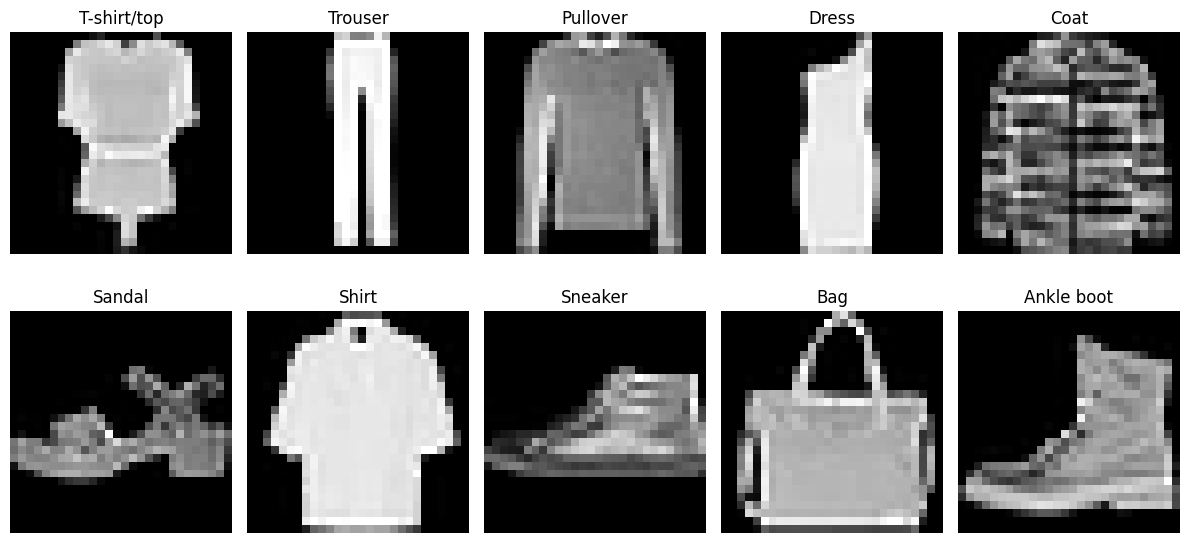

In [16]:

# Displaying a few sample images from each class
class_labels = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

fig, axes = plt.subplots(2, 5, figsize=(12, 6))

axes = axes.flatten()

for i, ax in enumerate(axes):
    
    class_label = class_labels[i]
    class_samples = train_data.loc[train_data['label'] == i].iloc[0, 1:].values.reshape(28, 28)
    ax.imshow(class_samples, cmap='gray')
    ax.set_title(class_label)
    ax.axis('off')

plt.tight_layout()
plt.savefig(parent_directory +'/images/sample_images.png')
plt.show()


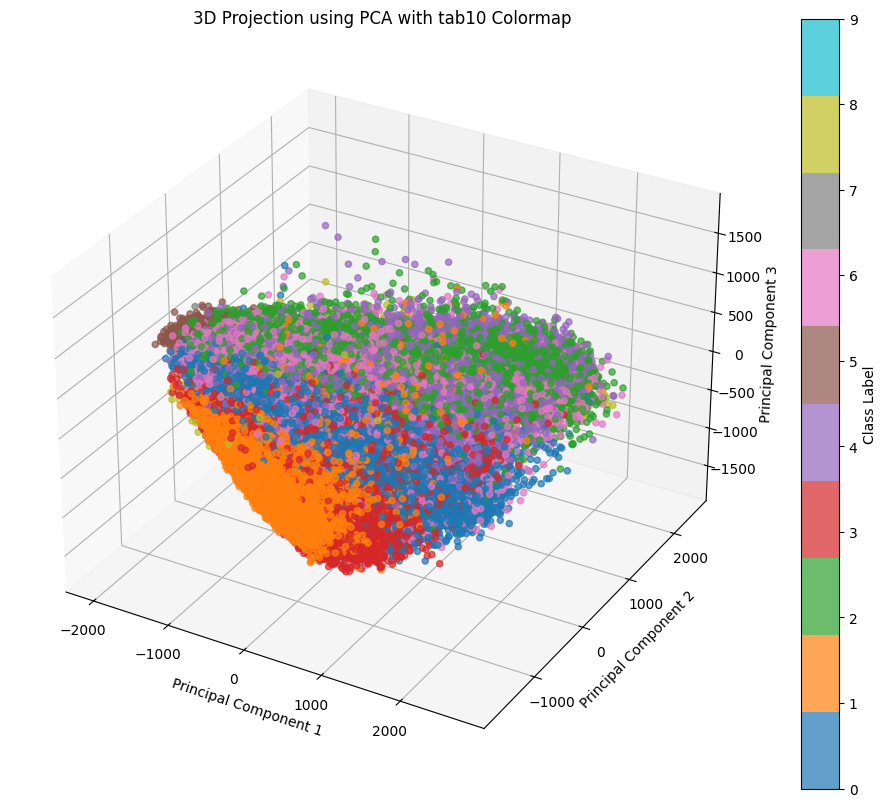

In [17]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

# Dimensionality reduction using PCA in 3 dimensions
X_train = train_data.iloc[:, 1:]
y_train = train_data['label']

# Performing PCA
pca_3d = PCA(n_components=3)
X_train_pca_3d = pca_3d.fit_transform(X_train)

# Ploting 3D Projection using PCA with 'tab10' colormap
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    X_train_pca_3d[:, 0],
    X_train_pca_3d[:, 1],
    X_train_pca_3d[:, 2],
    c=y_train,
    cmap='tab10',
    alpha=0.7
)

ax.set_title('3D Projection using PCA with tab10 Colormap')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

colorbar = plt.colorbar(scatter, ticks=range(10))
colorbar.set_label('Class Label')

plt.savefig(parent_directory +'/images/pca_3d_projection_tab10.png')  # Save the 3D PCA projection plot with tab10 colormap
plt.show()


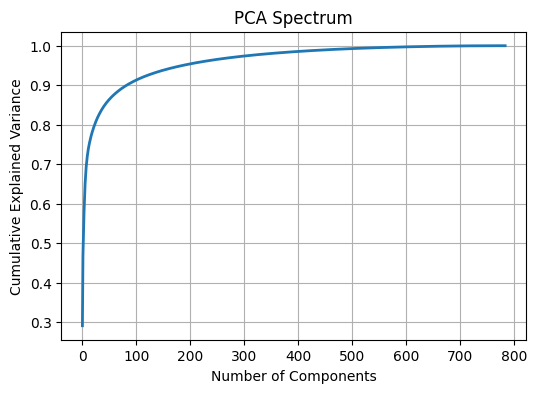

In [18]:
from sklearn.decomposition import PCA

pca_full = PCA(n_components=784)
pca_784 = pca_full.fit_transform(X_train)

# Calculating the cumulative explained variance ratio
cumulative_explained_variance_ratio = np.cumsum(pca_full.explained_variance_ratio_)

plt.figure(figsize=(6, 4))
plt.plot(cumulative_explained_variance_ratio, linewidth=2)
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Spectrum")
plt.grid(True)
plt.savefig(parent_directory +'/images/pca_spectrum.png')  
plt.show()

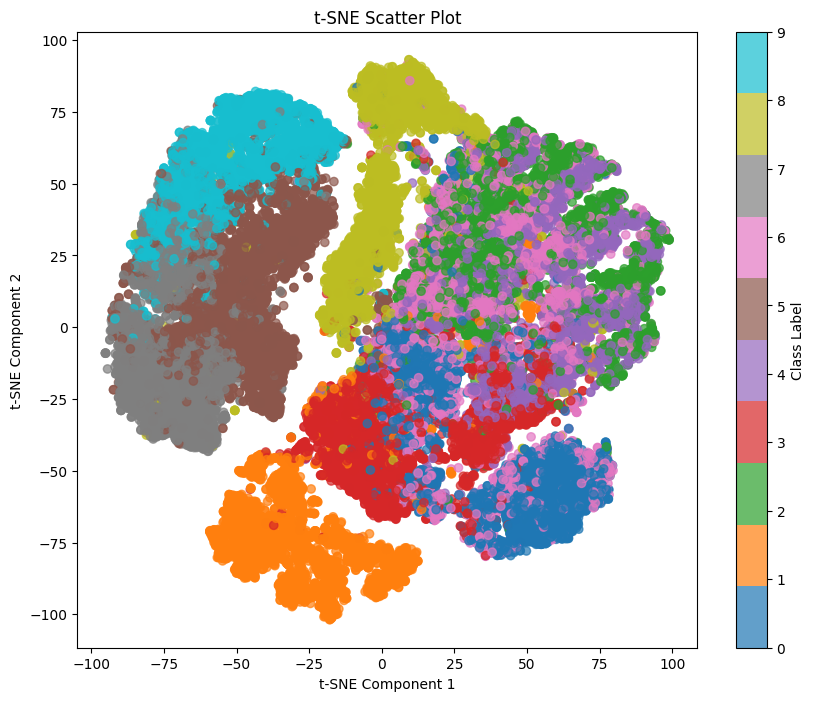

In [19]:
from sklearn.manifold import TSNE

# # Assuming train_data is your DataFrame
# # Extracting features and labels
# X_train = train_data.iloc[:, 1:]
# y_train = train_data['label']

# # Performing t-SNE with 2 components
# tsne = TSNE(n_components=2, random_state=42)
# X_train_tsne = tsne.fit_transform(X_train)

# # Ploting the t-SNE scatter plot
# plt.figure(figsize=(10, 8))
# scatter = plt.scatter(
#     X_train_tsne[:, 0],
#     X_train_tsne[:, 1],
#     c=y_train,
#     cmap='tab10',
#     alpha=0.7
# )

# plt.title('t-SNE Scatter Plot')
# plt.xlabel('t-SNE Component 1')
# plt.ylabel('t-SNE Component 2')
# colorbar = plt.colorbar(scatter, ticks=range(10))
# colorbar.set_label('Class Label')
# plt.savefig(parent_directory +'/images/t-SNE scatter plot.png')
# plt.show()


## Data Pre-processing

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
#reading training and validation data and its labels

train_labels = train_data['label'].values
val_labels = val_data['label'].values
test_labels = test_data['label'].values

train_labels = np.array(train_labels,dtype='float64')
val_labels = np.array(val_labels,dtype='float64')
test_labels = np.array(test_labels,dtype='float64')

In [22]:
#converting the 784 images into (28,28,1) to train a CNN
train_images = []
val_images = []
test_images = []

for i in range(len(train_data)):
    train_images.append(train_data.iloc[i,:].values[1:].reshape(28,28,1))
for i in range(len(val_data)):
    val_images.append(val_data.iloc[i,:].values[1:].reshape(28,28,1))
for i in range(len(test_data)):
    test_images.append(test_data.iloc[i,:].values[1:].reshape(28,28,1))

In [23]:
def plot_img(img):
    plt.imshow(img, cmap='gray')
    plt.show()
    return

In [24]:
#scaling images so that the pixel values fall in between 0 and 1
train_images = np.array(train_images,dtype='float64')/255.0
val_images = np.array(val_images,dtype='float64')/255.0
test_images = np.array(test_images,dtype='float64')/255.0

train_labels = train_labels.reshape(train_labels.shape[0],1)
val_labels = val_labels.reshape(val_labels.shape[0],1)
test_labels = test_labels.reshape(test_labels.shape[0],1)

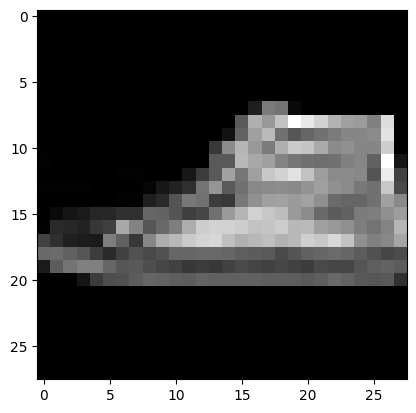

In [25]:
plot_img(train_images[1])

In [26]:
#printing train validation split data shapes
print('Training Data Shape :', train_images.shape)
print('Training Labels Shape :', train_labels.shape)
print('Validation Data Shape :', val_images.shape)
print('Validation Labels Shape :', val_labels.shape)
print('Testing Data Shape :', test_images.shape)
print('Testing Labels Shape :', test_labels.shape)

Training Data Shape : (45000, 28, 28, 1)
Training Labels Shape : (45000, 1)
Validation Data Shape : (15000, 28, 28, 1)
Validation Labels Shape : (15000, 1)
Testing Data Shape : (10000, 28, 28, 1)
Testing Labels Shape : (10000, 1)


## Training

In [27]:
from utils import ModelResNet

In [28]:
res_net = ModelResNet()

In [29]:
input_shape = (28,28,1)
num_classes=10
num_residual_blocks = 3
filters = 64

In [30]:
model = res_net.create_model_resnet(input_shape, num_classes, num_residual_blocks, filters)

In [31]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 28, 28, 1)]          0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 28, 28, 64)           640       ['input_1[0][0]']             
                                                                                                  
 conv2d_1 (Conv2D)           (None, 28, 28, 64)           36928     ['conv2d[0][0]']              
                                                                                                  
 conv2d_2 (Conv2D)           (None, 28, 28, 64)           36928     ['conv2d_1[0][0]']            
                                                                                              

In [32]:
model.compile(optimizer='adam',loss='SparseCategoricalCrossentropy',metrics=['accuracy'])

In [33]:
from tensorflow.keras.callbacks import EarlyStopping

# early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
# history = model.fit(train_images, train_labels, epochs=1, batch_size=32, validation_data=(val_images, val_labels),callbacks=[early_stopping],)

1407/1407 [==============================] - 243s 173ms/step - loss: 0.7992 - accuracy: 0.6978 - val_loss: 0.5146 - val_accuracy: 0.8069


In [34]:
#model.save_weights('weights/weights_res_net_3_64.h5')

In [35]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 28, 28, 1)]          0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 28, 28, 64)           640       ['input_1[0][0]']             
                                                                                                  
 conv2d_1 (Conv2D)           (None, 28, 28, 64)           36928     ['conv2d[0][0]']              
                                                                                                  
 conv2d_2 (Conv2D)           (None, 28, 28, 64)           36928     ['conv2d_1[0][0]']            
                                                                                              

## Model Evaluation

In [36]:
model.load_weights('weights/weights_res_net_3_64.h5')

In [37]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 14s 45ms/step - loss: 0.1954 - accuracy: 0.9295


[0.19544671475887299, 0.9294999837875366]

In [38]:
model.evaluate(val_images, val_labels)

469/469 [==============================] - 21s 45ms/step - loss: 0.2226 - accuracy: 0.9228


[0.22257664799690247, 0.9228000044822693]

In [39]:
val_pred = model.predict(val_images)
val_pred = np.argmax(val_pred,axis=1)

test_pred = model.predict(test_images)
test_pred = np.argmax(test_pred,axis=1)

313/313 [==============================] - 14s 44ms/step


In [40]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
def evaluation_metrics(val_labels, val_pred, label):
    # Creating the confusion matrix
    conf_matrix = confusion_matrix(val_labels, val_pred)

    # Plotting the confusion matrix as a heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix for ' + label)
    plt.show()


    # Calculating precision, recall, and F1 score
    precision = precision_score(val_labels, val_pred, average='weighted')
    recall = recall_score(val_labels, val_pred, average='weighted')
    f1 = f1_score(val_labels, val_pred, average='weighted')

    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)

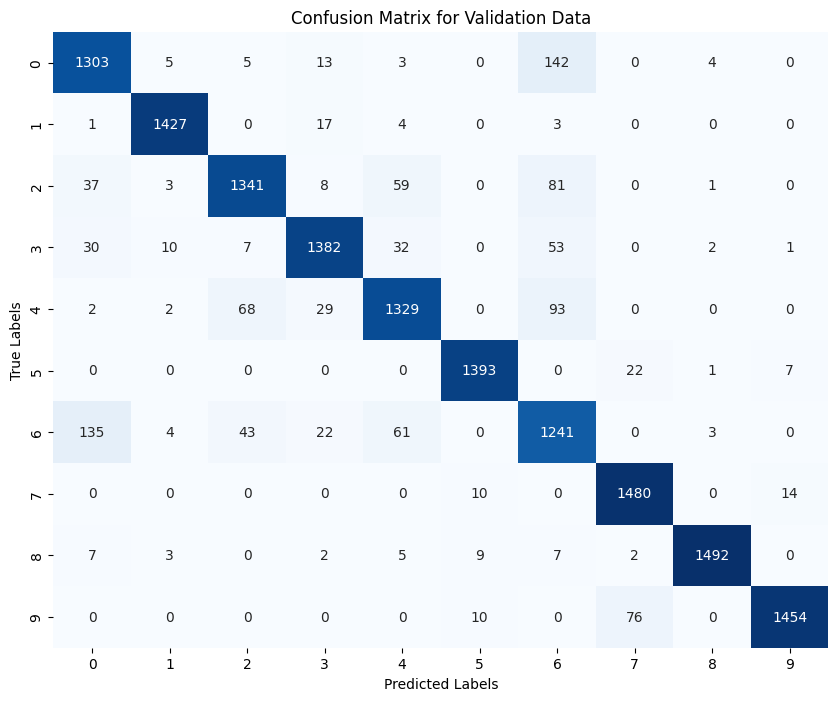

Precision: 0.924380296617354
Recall: 0.9228
F1 Score: 0.9232913119039696


In [41]:
evaluation_metrics(val_labels, val_pred, "Validation Data")

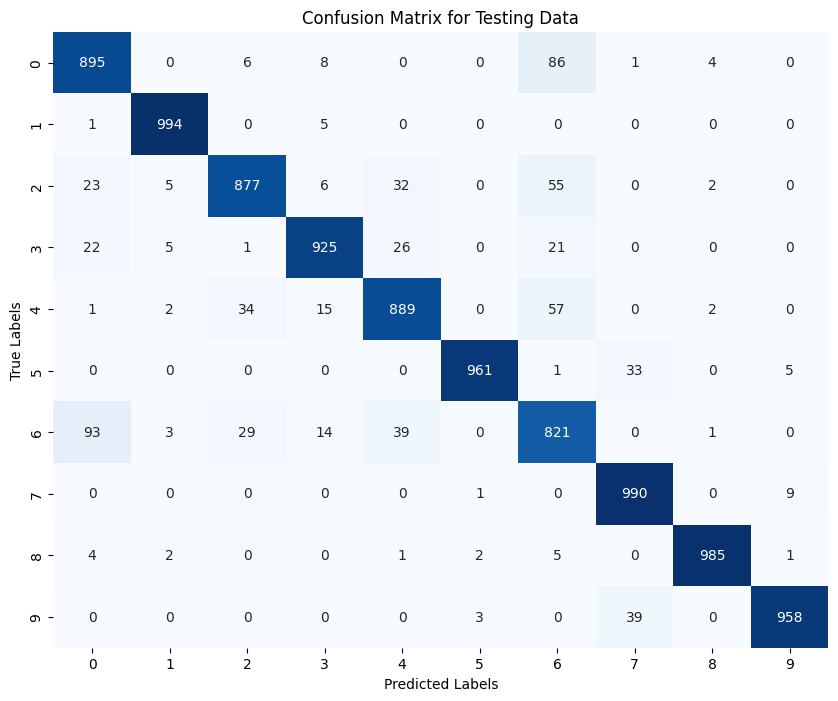

Precision: 0.9307595735628543
Recall: 0.9295
F1 Score: 0.9298297322474715


In [42]:
evaluation_metrics(test_labels, test_pred, "Testing Data")

## Interpreting the Model

In [43]:
model.load_weights('weights/weights_res_net_3_64.h5')

1/1 [==============================] - 0s 11ms/step


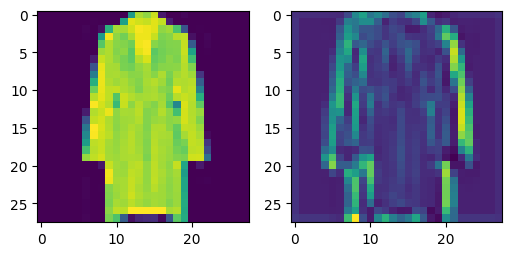

In [44]:
import tensorflow as tf
def generate_grad_cam(model, last_conv_layer_name, image, class_index):
    grad_model = tf.keras.models.Model([model.inputs], [model.get_layer(last_conv_layer_name).output, model.output])
    
    with tf.GradientTape() as tape:
        conv_output, predictions = grad_model(image)
        class_output = predictions[:, class_index]

    grads = tape.gradient(class_output, conv_output)
    pooled_grads = tf.reduce_mean(tf.nn.relu(grads), axis=(0, 1, 2))
    conv_output = conv_output[0]
    heatmap = tf.reduce_sum(tf.multiply(pooled_grads, conv_output), axis=-1)

    heatmap /= np.max(heatmap)

    return heatmap

img = val_images[2]
class_index = np.argmax(model.predict(img.reshape(1,28,28,1)))


last_conv_layer_name = 'conv2d_1'  
heatmap = generate_grad_cam(model, last_conv_layer_name, img.reshape(1,28,28,1), class_index)

fig, axs = plt.subplots(1, 2, figsize=(6,6))

axs[0].imshow(img)
axs[1].imshow(heatmap)
plt.show()

1/1 [==============================] - 0s 9ms/step


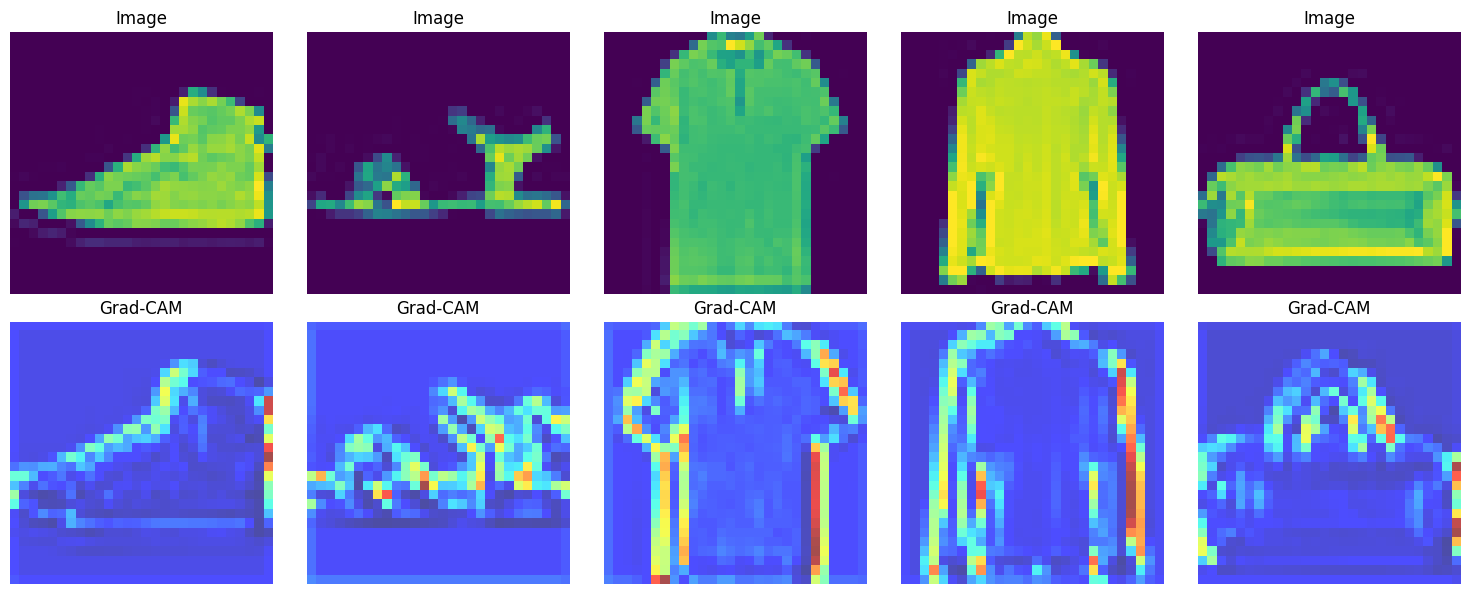

In [45]:
import matplotlib.pyplot as plt
import numpy as np

images = val_images[35:40]
fig, axs = plt.subplots(2, 5, figsize=(15, 6))

for i in range(5):
    axs[0, i].imshow(images[i])
    axs[0, i].set_title("Image")
    axs[0, i].axis('off')
    class_index = np.argmax(model.predict(images[i].reshape(1,28,28,1)))
    axs[1, i].imshow(generate_grad_cam(model, last_conv_layer_name, images[i].reshape(1,28,28,1), class_index), cmap='jet', alpha=0.7)  # Adjust alpha for transparency
    axs[1, i].set_title("Grad-CAM")
    axs[1, i].axis('off')

plt.tight_layout()
plt.show()

1/1 [==============================] - 0s 9ms/step


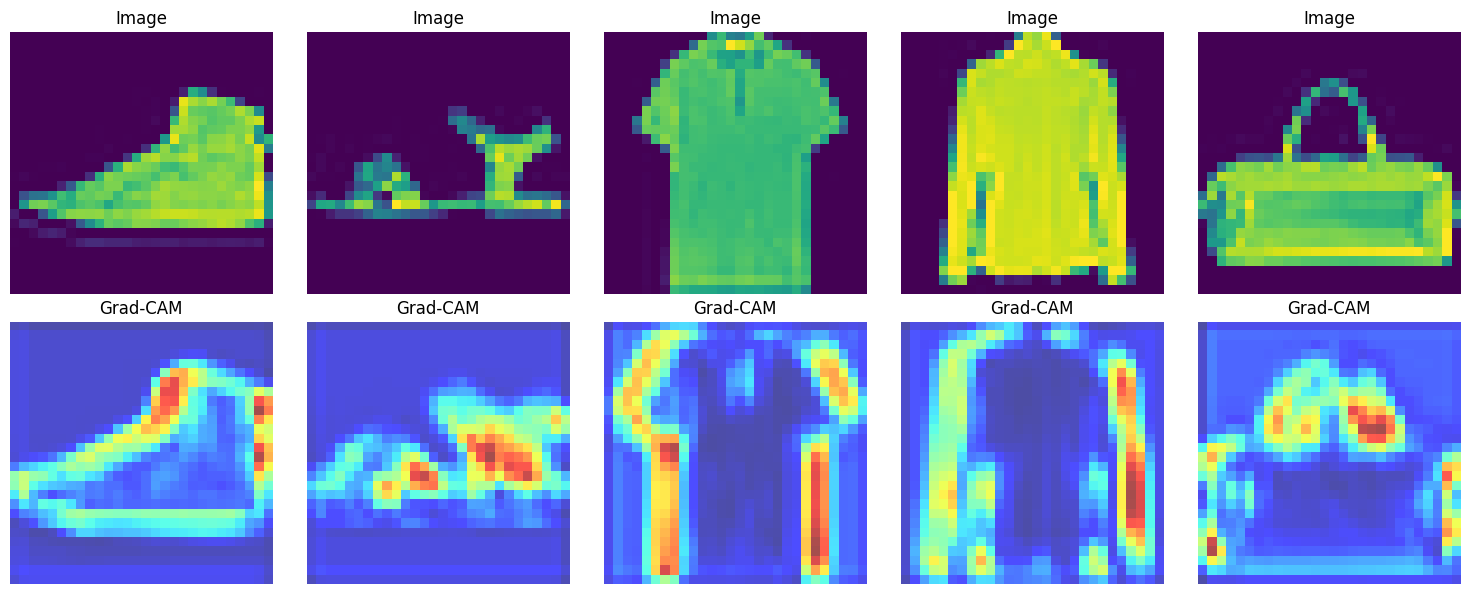

In [46]:
last_conv_layer_name = 'conv2d_2'  

images = val_images[35:40]
fig, axs = plt.subplots(2, 5, figsize=(15, 6))

for i in range(5):
    axs[0, i].imshow(images[i])
    axs[0, i].set_title("Image")
    axs[0, i].axis('off')
    class_index = np.argmax(model.predict(images[i].reshape(1,28,28,1)))
    axs[1, i].imshow(generate_grad_cam(model, last_conv_layer_name, images[i].reshape(1,28,28,1), class_index), cmap='jet', alpha=0.7)  # Adjust alpha for transparency
    axs[1, i].set_title("Grad-CAM")
    axs[1, i].axis('off')

plt.tight_layout()
plt.show()